In [1]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'
%matplotlib inline

In [2]:
import numpy as np
import pandas as  pd
import netCDF4

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import cmocean.cm as cmo

In [3]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1T-CszMQ9ihFnr1mHZNSrQGZ1b8h4-_Ne' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1T-CszMQ9ihFnr1mHZNSrQGZ1b8h4-_Ne" -O 5_hvel.nc

--2019-02-13 16:14:58--  https://docs.google.com/uc?export=download&confirm=Bn_n&id=1T-CszMQ9ihFnr1mHZNSrQGZ1b8h4-_Ne
Resolving docs.google.com (docs.google.com)... 216.58.200.238, 2404:6800:4012:1::200e
Connecting to docs.google.com (docs.google.com)|216.58.200.238|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tnidtql5qieot6dm9u0gq7v44rjst66k/1550044800000/05668089712544318047/*/1T-CszMQ9ihFnr1mHZNSrQGZ1b8h4-_Ne?e=download [following]
--2019-02-13 16:14:58--  https://doc-0s-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tnidtql5qieot6dm9u0gq7v44rjst66k/1550044800000/05668089712544318047/*/1T-CszMQ9ihFnr1mHZNSrQGZ1b8h4-_Ne?e=download
Resolving doc-0s-80-docs.googleusercontent.com (doc-0s-80-docs.googleusercontent.com)... 216.58.200.33, 2404:6800:4008:803::2001
Connecting to doc-0s-80-docs.googleusercontent.com (doc-0s-80-

In [4]:
data=netCDF4.Dataset('5_hvel.nc')

In [5]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    dimensions(sizes): node(3573), nele(6234), nface(3), nv(33), one(1), sigma(26), nz(7), time(168)
    variables(dimensions): float32 time(time), int32 ele(nele,nface), float32 x(node), float32 y(node), float32 depth(node), float32 sigma(sigma), float32 sigma_h_c(one), float32 sigma_theta_b(one), float32 sigma_theta_f(one), float32 sigma_maxdepth(one), float32 Cs(sigma), float32 z(nz), float32 u(time,nv,node), float32 v(time,nv,node), int32 mesh()
    groups: 

In [6]:
u=data['u'][:]
u.data[u.data==-9.99900000e+03  ]=np.nan
v=data['v'][:]
v.data[v.data==-9.99900000e+03]=np.nan
spd=(u*u+v*v)**0.5
u=u.data
v=v.data
spd.data[spd.data==1.00000002e+20]=np.nan
spd=spd.data

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
time,layer,node=u.shape

In [8]:
grid=pd.read_csv('hgrid.ll',header=None,skiprows=[0])
ne,nd=grid[0][0].split()
ne=int(ne)
nd=int(nd)

In [9]:
lon=[]
lat=[]
dep=[]
for i in range(nd):
    a,x,y,z=grid[0][i+1].split()
    lon.append(float(x))
    lat.append(float(y))
    dep.append(float(z))

In [10]:
maxlon=max(lon)
minlon=min(lon)
maxlat=max(lat)
minlat=min(lat)

In [11]:

m=Basemap(projection='merc',llcrnrlat=minlat,urcrnrlat=maxlat,\
            llcrnrlon=minlon,urcrnrlon=maxlon,resolution='h') #resolution='h'


In [12]:
lon=np.array(lon)
lat=np.array(lat)
xx,yy=m(lon,lat)


/opt/conda/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'tri'
  s)


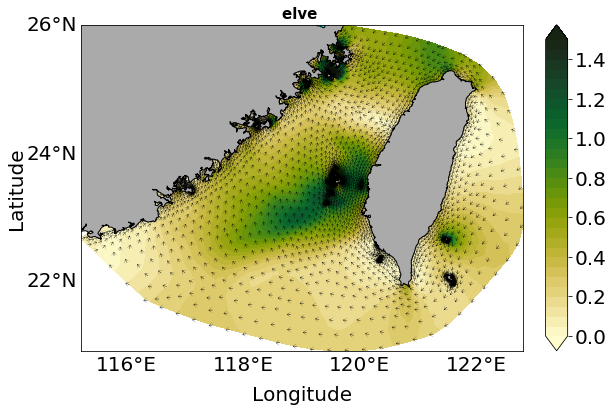

In [13]:
sd=spd[0,layer-1,:]
uc=u[0,layer-1,:]
vc=v[0,layer-1,:]

fig = plt.figure()
fig.set_size_inches(10, 6, forward=True)
#cs=m.contourf(xx,yy,elev[1,:],np.linspace(-1.5,1.5,31,endpoint=True),tri = True,extend='both',cmap=cmo.balance)
cs=m.contourf(xx,yy,sd,np.linspace(0,1.5,31),tri = True,extend='both',cmap='cmo.speed')
m.quiver(xx, yy,uc/sd, vc/sd,headwidth=15,headlength=10,headaxislength=2,width=0.001)
#color bar  pad is distance in colobar to pic
cbar = m.colorbar(cs, location='right', pad="5%")
#set fontsize in color bar 
cbar.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.fillcontinents(color='#AAAAAA',lake_color='aqua')
#make ylabel
m.drawparallels(np.arange(18,30,2),labels=[1,0,0,0],fontsize=20, linewidth=0.0)
#make xlabel
m.drawmeridians(np.arange(110,130,2),labels=[0,0,0,1],fontsize=20, linewidth=0.0)
#title
plt.title('elve '  ,fontsize=15,weight='bold')         
plt.xlabel('Longitude',fontsize=20, labelpad=35)
plt.ylabel('Latitude',fontsize=20,  labelpad=55)
fig.savefig('uv1.png')

In [14]:
pts=pd.read_csv('pts.idx',header=None)
pts=np.array(pts[0])-1

/opt/conda/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'tri'
  s)


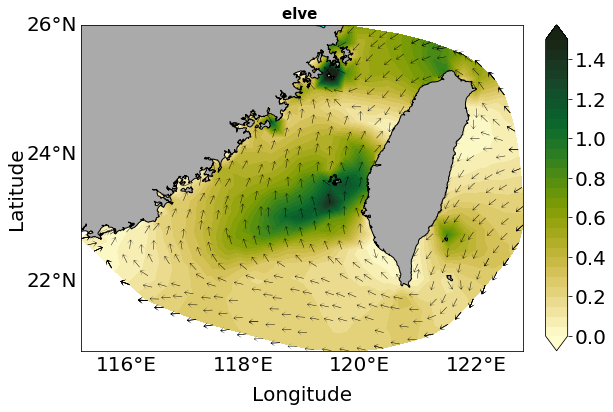

In [15]:
x_ptx=xx[pts]
y_ptx=yy[pts]
sd=spd[0,layer-1,pts]
uc=u[0,layer-1,pts]
vc=v[0,layer-1,pts]

fig = plt.figure()
fig.set_size_inches(10, 6, forward=True)
#cs=m.contourf(xx,yy,elev[1,:],np.linspace(-1.5,1.5,31,endpoint=True),tri = True,extend='both',cmap=cmo.balance)
cs=m.contourf(x_ptx,y_ptx,sd,np.linspace(0,1.5,31),tri = True,extend='both',cmap='cmo.speed')
m.quiver(x_ptx,y_ptx,uc/sd, vc/sd,headwidth=15,headlength=10,headaxislength=2,width=0.001)
#color bar  pad is distance in colobar to pic
cbar = m.colorbar(cs, location='right', pad="5%")
#set fontsize in color bar 
cbar.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.fillcontinents(color='#AAAAAA',lake_color='aqua')
#make ylabel
m.drawparallels(np.arange(18,30,2),labels=[1,0,0,0],fontsize=20, linewidth=0.0)
#make xlabel
m.drawmeridians(np.arange(110,130,2),labels=[0,0,0,1],fontsize=20, linewidth=0.0)
#title
plt.title('elve '  ,fontsize=15,weight='bold')         
plt.xlabel('Longitude',fontsize=20, labelpad=35)
plt.ylabel('Latitude',fontsize=20,  labelpad=55)
fig.savefig('uv2.png')